  # Régression Multivariée

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. cleaning Dataset
Notre dataset pour but de predire le prix d'une maison selon plusieur critaire 

In [2]:
df= pd.read_csv('kc_house_data.csv')
# Display the first five observations
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Describe the dataset
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21611.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.40,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.13,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [4]:
# Drop the id and date columns
df = df.drop(['id', 'date'], axis=1)

In [5]:
# Check the types of data
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# Specify target and features
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()
print("features : ",features)
print("target : ",target)

features :  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
target :  price


In [7]:
# Correlations of features with target variable
correlations = df.corr()
correlations['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [8]:
# Correlations with target variable
cor_target = abs(correlations['price'])

# Display features with correlation < 0.2
removed_features = cor_target[cor_target < 0.2]
removed_features

sqft_lot        0.089661
condition       0.036362
yr_built        0.054012
yr_renovated    0.126434
zipcode         0.053203
long            0.021626
sqft_lot15      0.082447
Name: price, dtype: float64

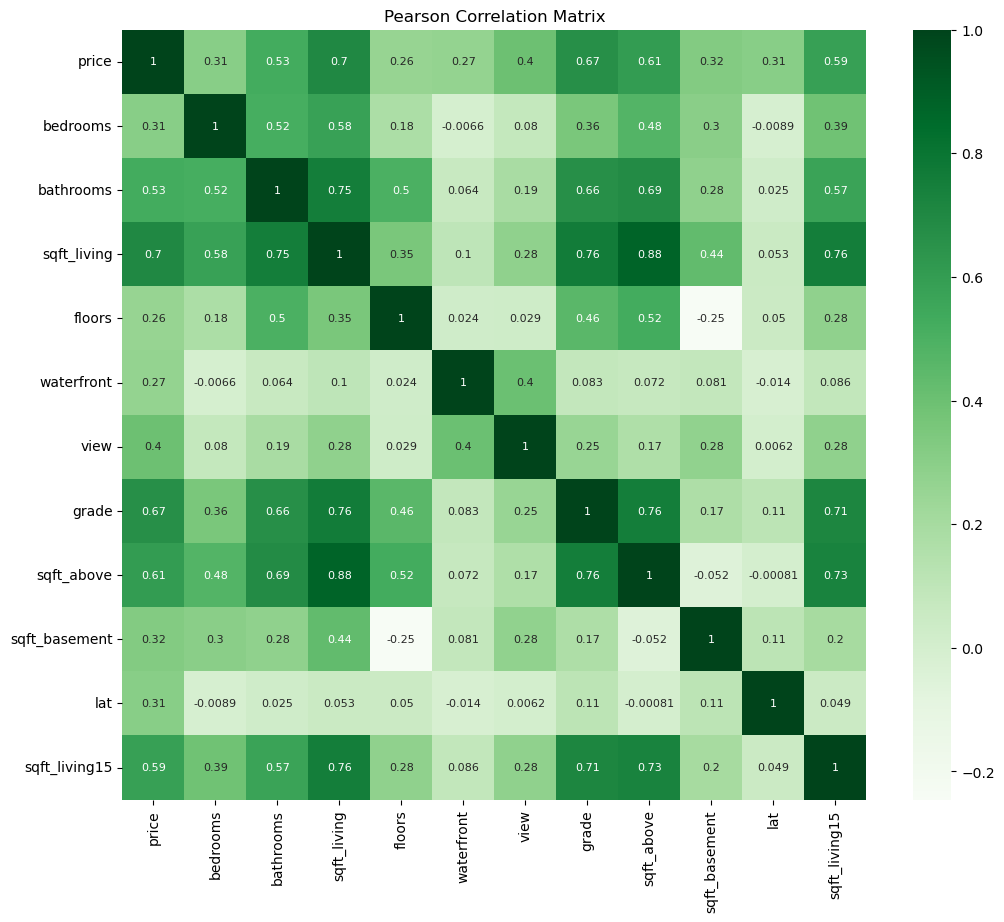

In [9]:
# Remove features with correlation < 0.2
df = df.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long',
              'sqft_lot15'], axis=1)

# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [10]:
# Determine the highest intercorrelations
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.0,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1.0,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1.0,0.754665,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754665,1.0,-,-,-,0.762704,0.876644,-,-,0.75642
floors,-,-,-,-,1.0,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,1.0,-,-,-,-,-,-
view,-,-,-,-,-,-,1.0,-,-,-,-,-
grade,-,-,-,0.762704,-,-,-,1.0,0.755924,-,-,-
sqft_above,-,-,-,0.876644,-,-,-,0.755924,1.0,-,-,-
sqft_basement,-,-,-,-,-,-,-,-,-,1.0,-,-


In [11]:
# Remove features which are highly correlated with "sqft_living"
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

In [12]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
print(" nbr of new featers = ",len_of_features)

 nbr of new featers =  9


In [13]:
# Normalize the features
df.iloc[:, 1:] = (df - df.mean())/df.std()

 # la phase de training
     Dans cette phase on vat diviser notre dataset : une pour le taining(70% de notre dataset) et l'autre pour le test(30% de notre dataset) 
     

In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,221900.0,-0.866697,-0.398728,-1.447430,-0.979812,-0.915406,-0.087171,-0.305752,-0.558823,-0.658666
1,538000.0,-0.005688,-0.398728,0.175603,0.533622,0.936484,-0.087171,-0.305752,-0.558823,0.245136
2,180000.0,-0.980827,-1.473925,-1.447430,-1.426221,-0.915406,-0.087171,-0.305752,-1.409554,-0.658666
3,604000.0,0.174086,0.676469,1.149422,-0.130547,-0.915406,-0.087171,-0.305752,-0.558823,1.397483
4,510000.0,-0.081956,-0.398728,-0.149004,-0.435412,-0.915406,-0.087171,-0.305752,0.291909,-0.658666


In [15]:
len(df)

21613

In [65]:
from sklearn.model_selection import train_test_split


#diviser un ensemble de données en deux sous-ensembles: un ensemble de données d'entraînement (train et train)
train,test= train_test_split(df, test_size=0.2, random_state=42)

print(X.shape)
print(train.shape)
print(test.shape)

(21613, 9)
(17290, 10)
(4323, 10)


In [66]:
#download the dataset of training and test to a csv file
train.to_csv("house_train.csv")
test.to_csv("house_test.csv")



# la phase d'evaluation
dans cette phase on va utiliser les deux sous-ensembles pour puisse entrainner notre model et le tester

In [67]:
trainData = pd.read_csv("house_train.csv")
trainData.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,6325,325000.0,-0.585868,-0.398728,-0.473610,-0.326531,-0.915406,-0.087171,-0.305752,1.142641,-0.658666
1,13473,257000.0,-0.771090,-1.473925,-1.447430,-1.175797,-0.915406,-0.087171,-0.305752,-1.409554,-0.206765
2,17614,228500.0,-0.848720,-0.398728,-1.447430,-1.088693,0.010539,-0.087171,-0.305752,-1.409554,-0.455310
3,16970,288000.0,-0.686651,-0.398728,0.175603,0.010997,-0.915406,-0.087171,-0.305752,-0.558823,1.171532
4,20868,479000.0,-0.166395,-1.473925,0.500209,-0.368995,0.936484,-0.087171,-0.305752,0.291909,0.007888


In [68]:
testData = pd.read_csv("house_test.csv")
testData.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,735,365000.0,-0.476914,0.676469,0.175603,-0.010779,0.936484,-0.087171,-0.305752,0.291909,-0.658666
1,2830,865000.0,0.885012,1.751667,1.149422,0.892927,-0.915406,-0.087171,-0.305752,0.291909,1.759003
2,4106,1038000.0,1.356238,0.676469,0.500209,1.840184,0.936484,-0.087171,2.304132,2.844104,-0.658666
3,16218,1490000.0,2.587419,-0.398728,1.798635,2.700337,0.936484,-0.087171,2.304132,3.694836,-0.658666
4,19964,711000.0,0.465539,-0.398728,0.500209,0.511846,0.936484,-0.087171,-0.305752,1.142641,-0.658666


In [99]:
# convert DataFrame to matrix
X1 = trainData['bedrooms'].values.reshape(-1, 1)
X2 = trainData['bathrooms'].values.reshape(-1, 1)
X3 = trainData['sqft_living'].values.reshape(-1, 1)
X4 = trainData['floors'].values.reshape(-1, 1)
X5 = trainData['waterfront'].values.reshape(-1, 1)
X6 = trainData['view'].values.reshape(-1, 1)
X7 = trainData['grade'].values.reshape(-1, 1)
X8 = trainData['sqft_basement'].values.reshape(-1, 1)
X9 = trainData['lat'].values.reshape(-1, 1)

Y = trainData['price'].values

x = np.concatenate((X1,X2,X3,X4,X5,X6,X7,X8,X9), axis=1)
y = Y.reshape(-1, 1)

print(X1.shape)
print(X2.shape)
print(y.shape)

from sklearn import linear_model

modele = linear_model.LinearRegression()
modele.fit(x, y)


(17290, 1)
(17290, 1)
(17290, 1)


LinearRegression()

In [100]:

X1_test = testData['bedrooms'].values.reshape(-1, 1)
X2_test = testData['bathrooms'].values.reshape(-1, 1)
X3_test = testData['sqft_living'].values.reshape(-1, 1)
X4_test = testData['floors'].values.reshape(-1, 1)
X5_test = testData['waterfront'].values.reshape(-1, 1)
X6_test = testData['view'].values.reshape(-1, 1)
X7_test = testData['grade'].values.reshape(-1, 1)
X8_test = testData['sqft_basement'].values.reshape(-1, 1)
X9_test = testData['lat'].values.reshape(-1, 1)
y_test = testData['price'].values

x_test = np.concatenate((X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test), axis=1)
y = Y.reshape(-1, 1)

print(X1_test.shape)
print(X2_test.shape)
print(y_test.shape)

y_test_pred = modele.predict(x_test)


(4323, 1)
(4323, 1)
(4323,)


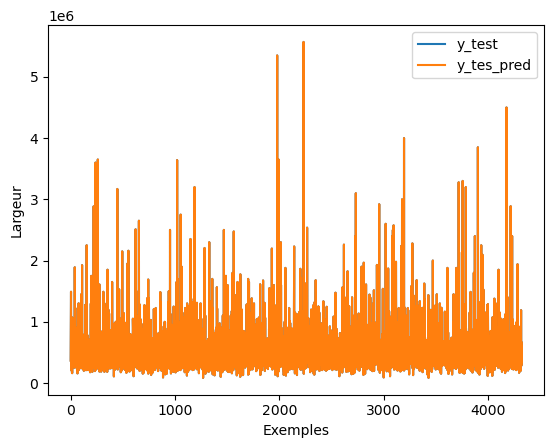

In [101]:
plt.plot(y_test, label='y_test')
plt.plot(y_test_pred, label='y_tes_pred')
plt.xlabel('Exemples')
plt.ylabel('Largeur')
plt.legend()
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_test_pred)
mse_test

1.0865377340703462e-19

In [109]:
from math import sqrt
sqrt(mse_test)

3.2962671828453866e-10

In [110]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

1.0

In [111]:
y_train_pred = modele.predict(x)

mse_train = mean_squared_error(y, y_train_pred)
print("MSE train", mse_train)
print("MSE test", mse_test)
print("RMSE train", sqrt(mse_train))
print("RMSE test", sqrt(mse_test))

MSE train 9.348931421024064e-20
MSE test 1.0865377340703462e-19
RMSE train 3.0576022339447723e-10
RMSE test 3.2962671828453866e-10


In [112]:
y_train_pred

array([[325000.],
       [257000.],
       [228500.],
       ...,
       [575000.],
       [245000.],
       [315000.]])